# WS_follow_along
# WESmith 06/01/23
## follow along with Karpathy video https://www.youtube.com/watch?v=VMj-3S1tku0

In [1]:
import math
import numpy as np
from graphviz import Digraph
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3 * x**2 - 4 * x + 5

In [3]:
f(3.0)

20.0

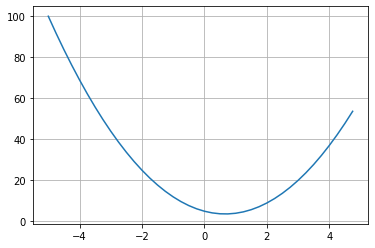

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)
plt.grid()

In [5]:
def diff(f, x, h=0.0001):  # WS
    return (f(x + h) - f(x))/h

In [6]:
h = 1e-8
diff(f, 3, h=h), diff(f, -3, h=h), diff(f, 2/3, h=h)

(14.00000009255109, -22.00000039920269, 0.0)

In [7]:
h = 0.0001
a =  2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [29]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data  = data
        self.grad  = 0.0
        self._prev = set(_children)
        self._op   = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out


In [39]:
a = Value( 2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L.grad = 1 # root node
a + b, a * b, d

(Value(data=-1.0), Value(data=-6.0), Value(data=4.0))

In [40]:
a.__add__(b), a.__mul__(b)  # equivalent

(Value(data=-1.0), Value(data=-6.0))

In [41]:
d._prev, d._op, type(d._prev)

({Value(data=-6.0), Value(data=10.0)}, '+', set)

In [50]:
def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n)) # WS built-in id() returns the identity of the object
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label='{%s | data %.4f | grad %.4f}' %\
                 (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

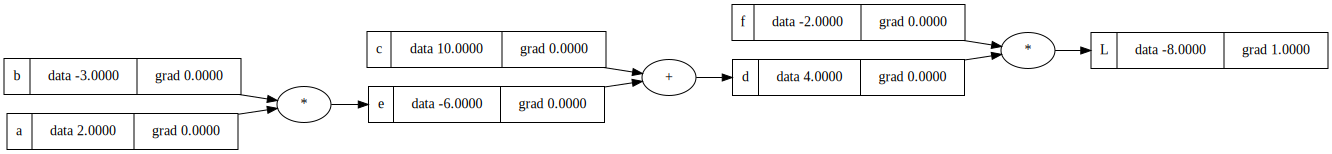

In [51]:
draw_dot(L)